# step 1:Load libraries

In [19]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

# step 2: load data

In [87]:
df=pd.read_csv('cv-valid-test.csv')
df2=pd.read_csv('truncated_train.csv')

# step 3: feature extraction

In [77]:
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)
    
    # pitch
   
    # Compute the pitch using piptrack
    pitch = librosa.piptrack(y=y, sr=sr)[0]
    # Compute a single value representing the pitch (e.g., mean)
    pitch_mean = np.mean(pitch[pitch > 0])  # Exclude negative pitch values

    #intensity
    intensity = librosa.feature.rms(y=y).mean()
    
    #duration
    duration = librosa.get_duration(y=y, sr=sr)
    
    #formants
        # Define the parameters for the spectrogram calculation
    n_fft = 2048  # FFT window size
    hop_length = 512  # Hop length for the STFT
    # Compute the spectrogram
    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    # Extract the frequencies
    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    # Find the indices corresponding to the frequency range of interest for formant analysis
    # Adjust these ranges according to the typical formant frequencies for your language
    f_min = 300  # Minimum frequency (Hz) for formant analysis
    f_max = 4000  # Maximum frequency (Hz) for formant analysis
    idx_min = np.argmin(np.abs(freqs - f_min))
    idx_max = np.argmin(np.abs(freqs - f_max))
    # Extract the magnitude spectrogram within the frequency range of interest
    D_interest = D[idx_min:idx_max, :]
    # Find the peak frequencies (formants) along the time axis
    peak_freqs = freqs[idx_min:idx_max][np.argmax(D_interest, axis=0)]
    # Compute the mean formant frequency
    mean_formant_frequency = np.mean(peak_freqs)
    
    # Spectral features 
    
    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    # Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    # Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).mean()
    # Spectral Roll-off
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    # Spectral Flatness
    spectral_flatness = librosa.feature.spectral_flatness(y=y).mean()
      # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean()
    # zero crosiing Features
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y).mean()
    # Chroma Features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean()
    # Spectral Flux
    spectral_flux = librosa.onset.onset_strength(y=y, sr=sr).mean()
    # Harmonic-to-Noise Ratio (HNR)
    hnr = librosa.effects.harmonic(y=y, margin=2.0).mean() / librosa.effects.percussive(y=y, margin=2.0).mean()
    
    D = librosa.stft(y)
    # Step 2: Compute the power spectrogram
    power_spectrogram = np.abs(D)**2
    # Step 3: Normalize the power spectrogram
    normalized_power_spectrogram = power_spectrogram / np.sum(power_spectrogram, axis=0)
    # Step 4: Compute the spectral entropy
    spectral_entropy = -np.sum(normalized_power_spectrogram * np.log2(normalized_power_spectrogram + 1e-12), axis=0).mean()  # Adding a small value to avoid log(0)
    # Spectral Sparsity
    spectral_sparsity = sum(librosa.feature.spectral_centroid(y=y)) / sum(librosa.feature.spectral_bandwidth(y=y))
    spectral_sparsity =spectral_sparsity .mean()

    
    return pitch_mean,intensity,duration,mean_formant_frequency, spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,spectral_flatness, mfccs, zero_crossing_rate, chroma , spectral_flux, hnr,spectral_entropy,spectral_sparsity

# loop of file 1 for feature extraction

In [81]:
count=0
pitch_mean_list = []
intensity_list = []
duration_list = []
mean_formant_frequency_list = []
spectral_centroid_list = []
spectral_bandwidth_list = []
spectral_contrast_list = []
spectral_rolloff_list = []
spectral_flatness_list = []
mfccs_list = []
zero_crossing_rate_list = []
chroma_list = []
spectral_flux_list = []
hnr_list = []
spectral_entropy_list = []
spectral_sparsity_list = []
for filename in df['filename']:
    pitch_mean,intensity,duration,mean_formant_frequency, spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,spectral_flatness, mfccs, zero_crossing_rate, chroma , spectral_flux, hnr,spectral_entropy,spectral_sparsity=extract_features(filename)
    pitch_mean_list.append(pitch_mean)
    intensity_list.append(intensity)
    duration_list.append(duration)
    mean_formant_frequency_list.append(mean_formant_frequency)
    spectral_centroid_list.append(spectral_centroid)
    spectral_bandwidth_list.append(spectral_bandwidth)
    spectral_contrast_list.append(spectral_contrast)
    spectral_rolloff_list.append(spectral_rolloff)
    spectral_flatness_list.append(spectral_flatness)
    mfccs_list.append(mfccs)
    zero_crossing_rate_list.append(zero_crossing_rate)
    chroma_list.append(chroma)
    spectral_flux_list.append(spectral_flux)
    hnr_list.append(hnr)
    spectral_entropy_list.append(spectral_entropy)
    spectral_sparsity_list.append(spectral_sparsity)  
    count+=1
    print(count)
df['Pitch'] = pitch_mean_list
df['Intensity'] = intensity_list
df['Duration'] = duration_list
df['Mean_Formant_Frequency'] = mean_formant_frequency_list
df['Spectral_Centroid'] = spectral_centroid_list
df['Spectral_Bandwidth'] = spectral_bandwidth_list
df['Spectral_Contrast'] = spectral_contrast_list
df['Spectral_Rolloff'] = spectral_rolloff_list
df['Spectral_Flatness'] = spectral_flatness_list
df['MFCCs'] = mfccs_list
df['Zero_Crossing_Rate'] = zero_crossing_rate_list
df['Chroma'] = chroma_list
df['Spectral_Flux'] = spectral_flux_list
df['HNR'] = hnr_list
df['Spectral_Entropy'] = spectral_entropy_list
df['Spectral_Sparsity'] = spectral_sparsity_list
    
    

1
2
3


C:\Users\Hp\AppData\Local\Temp\ipykernel_2492\4047776444.py:66: RuntimeWarning: invalid value encountered in divide
  normalized_power_spectrogram = power_spectrogram / np.sum(power_spectrogram, axis=0)
C:\Users\Hp\AppData\Local\Temp\ipykernel_2492\4047776444.py:70: RuntimeWarning: invalid value encountered in divide
  spectral_sparsity = sum(librosa.feature.spectral_centroid(y=y)) / sum(librosa.feature.spectral_bandwidth(y=y))


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

C:\Users\Hp\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Hp\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Hp\anaconda3\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\Hp\AppData\Local\Temp\ipykernel_2492\4047776444.py:60: RuntimeWarning: invalid value encountered in scalar divide
  hnr = librosa.effects.harmonic(y=y, margin=2.0).mean() / librosa.effects.percussive(y=y, margin=2.0).mean()


1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356


2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995


# loop of file 2 for feature extraction

In [88]:
count=0
pitch_mean_list = []
intensity_list = []
duration_list = []
mean_formant_frequency_list = []
spectral_centroid_list = []
spectral_bandwidth_list = []
spectral_contrast_list = []
spectral_rolloff_list = []
spectral_flatness_list = []
mfccs_list = []
zero_crossing_rate_list = []
chroma_list = []
spectral_flux_list = []
hnr_list = []
spectral_entropy_list = []
spectral_sparsity_list = []
for filename in df2['filename']:
    pitch_mean,intensity,duration,mean_formant_frequency, spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,spectral_flatness, mfccs, zero_crossing_rate, chroma , spectral_flux, hnr,spectral_entropy,spectral_sparsity=extract_features(filename)
    pitch_mean_list.append(pitch_mean)
    intensity_list.append(intensity)
    duration_list.append(duration)
    mean_formant_frequency_list.append(mean_formant_frequency)
    spectral_centroid_list.append(spectral_centroid)
    spectral_bandwidth_list.append(spectral_bandwidth)
    spectral_contrast_list.append(spectral_contrast)
    spectral_rolloff_list.append(spectral_rolloff)
    spectral_flatness_list.append(spectral_flatness)
    mfccs_list.append(mfccs)
    zero_crossing_rate_list.append(zero_crossing_rate)
    chroma_list.append(chroma)
    spectral_flux_list.append(spectral_flux)
    hnr_list.append(hnr)
    spectral_entropy_list.append(spectral_entropy)
    spectral_sparsity_list.append(spectral_sparsity)  
    count+=1
    print(count)
df2['Pitch'] = pitch_mean_list
df2['Intensity'] = intensity_list
df2['Duration'] = duration_list
df2['Mean_Formant_Frequency'] = mean_formant_frequency_list
df2['Spectral_Centroid'] = spectral_centroid_list
df2['Spectral_Bandwidth'] = spectral_bandwidth_list
df2['Spectral_Contrast'] = spectral_contrast_list
df2['Spectral_Rolloff'] = spectral_rolloff_list
df2['Spectral_Flatness'] = spectral_flatness_list
df2['MFCCs'] = mfccs_list
df2['Zero_Crossing_Rate'] = zero_crossing_rate_list
df2['Chroma'] = chroma_list
df2['Spectral_Flux'] = spectral_flux_list
df2['HNR'] = hnr_list
df2['Spectral_Entropy'] = spectral_entropy_list
df2['Spectral_Sparsity'] = spectral_sparsity_list
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


C:\Users\Hp\AppData\Local\Temp\ipykernel_2492\4047776444.py:66: RuntimeWarning: invalid value encountered in divide
  normalized_power_spectrogram = power_spectrogram / np.sum(power_spectrogram, axis=0)
C:\Users\Hp\AppData\Local\Temp\ipykernel_2492\4047776444.py:70: RuntimeWarning: invalid value encountered in divide
  spectral_sparsity = sum(librosa.feature.spectral_centroid(y=y)) / sum(librosa.feature.spectral_bandwidth(y=y))


30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
29

1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076


3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715


5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354


6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993


8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632


10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
1022

11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
1159

12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
1295

14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
1432

# saving files  after extraction

In [83]:
df.to_csv("cv-valid.csv", index=False)

In [90]:
df2.to_csv("valid run1.csv", index=False)

# showing data  in dataframe

In [82]:
df

,filename,text,up_votes,down_votes,age,gender,accent,duration,Pitch,Intensity,...,Spectral_Contrast,Spectral_Rolloff,Spectral_Flatness,MFCCs,Zero_Crossing_Rate,Chroma,Spectral_Flux,HNR,Spectral_Entropy,Spectral_Sparsity
0,cv-valid-test/sample-000000.mp3,without the dataset the article is useless,1,0,NaN,NaN,NaN,NaN,810.312561,0.069398,...,22.765425,3639.421158,0.013020,-3.761325,0.099574,0.373245,2.137265,-0.536741,4.341870,0.926807
1,cv-valid-test/sample-000001.mp3,i've got to go to him,1,0,twenties,male,NaN,NaN,1603.776978,0.039991,...,20.779593,3830.218506,0.063335,-21.249702,0.119501,0.466889,1.637428,44.631382,5.256642,0.857713
2,cv-valid-test/sample-000002.mp3,and you know it,1,0,NaN,NaN,NaN,NaN,1908.096802,0.031930,...,21.279159,5286.401367,0.066150,-28.637157,0.219291,0.492784,2.136877,0.500512,6.119006,1.283178
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,twenties,male,us,NaN,1245.824585,0.009894,...,21.999681,4618.418057,0.065618,-35.330830,0.125718,0.383677,1.792285,-0.126966,NaN,NaN
4,cv-valid-test/sample-000004.mp3,hold your nose to keep the smell from disablin...,2,0,NaN,NaN,NaN,NaN,1511.515503,0.101290,...,24.048742,4997.204444,0.043407,-18.228287,0.185880,0.373941,1.905978,0.962182,5.693587,1.252862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,cv-valid-test/sample-003990.mp3,the old man opened his cape and the boy was st...,1,0,NaN,NaN,NaN,NaN,1240.809448,0.011082,...,21.602503,4513.922861,0.049955,-33.748684,0.115054,0.420757,1.748373,-0.009642,5.297781,0.934516
3991,cv-valid-test/sample-003991.mp3,in alchemy it's called the soul of the world,2,1,NaN,NaN,NaN,NaN,1223.340698,0.050365,...,22.586806,3543.015392,0.055894,-23.283295,0.131974,0.436926,1.700975,0.024504,5.704030,1.175538
3992,cv-valid-test/sample-003992.mp3,at that point in their lives everything is cle...,3,0,NaN,NaN,NaN,NaN,1271.195190,0.034260,...,22.595265,3985.589307,0.010156,-29.083868,0.130360,0.403542,1.962437,-0.000513,5.242969,1.159875
3993,cv-valid-test/sample-003993.mp3,he told them all to be seated,3,0,NaN,NaN,NaN,NaN,1692.100586,0.072601,...,22.227223,4425.073242,0.082306,-21.159086,0.150838,0.456897,1.472190,-0.118151,NaN,NaN


In [89]:
df2

,filename,text,up_votes,down_votes,age,gender,accent,duration,Pitch,Intensity,...,Spectral_Contrast,Spectral_Rolloff,Spectral_Flatness,MFCCs,Zero_Crossing_Rate,Chroma,Spectral_Flux,HNR,Spectral_Entropy,Spectral_Sparsity
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN,1416.695557,0.065184,...,23.420670,4150.494488,0.018130,-14.941163,0.130526,0.382842,2.195000,0.029298,5.370892,1.123255
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN,1889.079956,0.001252,...,19.449419,6263.453946,0.168732,-47.214642,0.230668,0.565086,1.355848,-0.113359,6.837667,1.106113
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN,1639.622681,0.041539,...,23.728287,5609.596064,0.036458,-19.593781,0.156393,0.358924,2.230331,0.208014,5.070880,1.161364
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN,1559.593018,0.007681,...,20.803659,4864.102992,0.054788,-35.517422,0.151512,0.397648,1.771810,-0.003974,5.385776,0.977486
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN,1194.287842,0.386169,...,22.106802,4652.957804,0.020659,-0.095642,0.108970,0.338093,2.025767,1.450639,4.414450,0.969796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14996,cv-valid-train/sample-014996.mp3,we speak of them only to children,4,0,NaN,NaN,NaN,NaN,1637.896118,0.043403,...,23.375312,3426.139100,0.002698,-21.833704,0.113846,0.448651,1.394505,-19.110420,5.258880,1.002702
14997,cv-valid-train/sample-014997.mp3,its been a long time since she last read chekh...,1,0,NaN,NaN,NaN,NaN,1053.944580,0.028516,...,20.505710,5325.178291,0.043447,-16.376354,0.141430,0.441078,1.491003,0.028205,5.150348,0.968873
14998,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,fourties,male,newzealand,NaN,1127.261841,0.074364,...,23.458034,4847.569538,0.010159,-15.137180,0.205843,0.391599,1.989406,0.032184,5.376817,0.979361
14999,cv-valid-train/sample-014999.mp3,yeah better if people are already familiar wit...,1,0,NaN,NaN,NaN,NaN,1120.412598,0.072214,...,22.629006,4297.528110,0.032672,-19.977356,0.118745,0.418453,1.679405,0.080637,5.303891,0.942757


# Step :4  data cleaning 

# merging both files

In [20]:
file_paths = ["cv-valid.csv", "valid run1.csv"]

dfs = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)

# i- dropping nan values method 

In [21]:
merged_df.dropna(subset=['age', 'gender','accent',], inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# ii- z-score normalization with positve method not negative

In [22]:
feature_columns = ['Pitch', 'Intensity', 'Duration', 'Mean_Formant_Frequency',
                   'Spectral_Centroid', 'Spectral_Bandwidth', 'Spectral_Contrast',
                   'Spectral_Rolloff', 'Spectral_Flatness', 'MFCCs', 'Zero_Crossing_Rate',
                   'Chroma', 'Spectral_Flux', 'HNR'
                   ]

In [23]:
max_value = 1  # Set the desired maximum value
#maxvalue*(data-min)/max-min
for feature in feature_columns:
    min_val = merged_df[feature].min()
    max_val = merged_df[feature].max()
    merged_df[feature] = max_value * (merged_df[feature] - min_val) / (max_val - min_val)

# iii-normalization

In [24]:
for feature in feature_columns:
    norm = np.linalg.norm(merged_df[feature])
    merged_df[feature] = merged_df[feature] / norm

In [25]:
merged_df

,filename,text,up_votes,down_votes,age,gender,accent,Pitch,Intensity,Duration,...,Spectral_Centroid,Spectral_Bandwidth,Spectral_Contrast,Spectral_Rolloff,Spectral_Flatness,MFCCs,Zero_Crossing_Rate,Chroma,Spectral_Flux,HNR
0,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,twenties,male,us,0.000002,0.003974,0.000205,...,1.311659e-06,0.000002,0.000250,7.774273e-07,0.011614,0.000164,0.014313,0.009716,0.002241,0.000199
1,cv-valid-test/sample-000005.mp3,down below in the darkness were hundreds of pe...,4,1,twenties,male,us,0.000002,0.018136,0.000112,...,1.027567e-06,0.000002,0.000277,5.587251e-07,0.003683,0.000226,0.012290,0.008889,0.002523,0.000200
2,cv-valid-test/sample-000008.mp3,this was the strangest of all things that ever...,1,0,thirties,male,england,0.000003,0.038540,0.000161,...,1.367586e-06,0.000002,0.000291,6.457104e-07,0.001408,0.000233,0.023281,0.010799,0.003364,0.000200
3,cv-valid-test/sample-000009.mp3,it was glaringly hot not a cloud in the sky no...,3,0,fifties,male,us,0.000004,0.013836,0.000105,...,1.102629e-06,0.000002,0.000277,5.292725e-07,0.003548,0.000197,0.016696,0.008639,0.002921,0.000199
4,cv-valid-test/sample-000014.mp3,follow the instructions here,1,0,twenties,male,scotland,0.000003,0.011396,0.000040,...,1.318474e-06,0.000002,0.000225,7.685981e-07,0.007053,0.000220,0.015323,0.015270,0.002354,0.000199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137,cv-valid-train/sample-014993.mp3,but the marketplace was empty and he was far f...,1,0,fourties,male,us,0.000002,0.005700,0.000198,...,1.463317e-06,0.000003,0.000226,9.143609e-07,0.007368,0.000209,0.011715,0.013276,0.002240,0.000199
6138,cv-valid-train/sample-014994.mp3,i have already described the appearance of tha...,2,0,thirties,female,canada,0.000003,0.009751,0.000174,...,1.604848e-06,0.000003,0.000236,8.950269e-07,0.011582,0.000187,0.021997,0.011347,0.002634,0.000200
6139,cv-valid-train/sample-014995.mp3,i'm afraid i already know a great many people,2,0,thirties,male,us,0.000003,0.029359,0.000062,...,7.374845e-07,0.000001,0.000274,3.661792e-07,0.000730,0.000234,0.010527,0.011353,0.002266,0.000199
6140,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,fourties,male,newzealand,0.000002,0.029888,0.000114,...,1.743404e-06,0.000003,0.000280,8.330602e-07,0.001780,0.000241,0.025816,0.010033,0.002554,0.000200


# step 5 : model training

In [26]:
# Define mapping
age_mapping = {
    'teens': (13, 19),
    'twenties': (20, 30),
    'thirties': (30, 40),
    'fourties': (40, 50),
    'fifties':(50,60),
    'sixties':(60,70),
    'seventies':(70,80),
    'eighties':(80,90)
    
}

# Function to convert age strings to integers
def convert_age(age_str):
    if age_str in age_mapping:
        return age_mapping[age_str]
    else:
        return (0, 0)  # Default value if age category not found

# Convert age strings to integer ranges
age_column_int = [convert_age(age_str) for age_str in merged_df['age']]

# Adjust the age range to be represented by a single value (e.g., taking the lower bound)
merged_df['age']= [age_range[0] if age_range else 0 for age_range in age_column_int]



In [27]:
merged_df

,filename,text,up_votes,down_votes,age,gender,accent,Pitch,Intensity,Duration,...,Spectral_Centroid,Spectral_Bandwidth,Spectral_Contrast,Spectral_Rolloff,Spectral_Flatness,MFCCs,Zero_Crossing_Rate,Chroma,Spectral_Flux,HNR
0,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,20,male,us,0.000002,0.003974,0.000205,...,1.311659e-06,0.000002,0.000250,7.774273e-07,0.011614,0.000164,0.014313,0.009716,0.002241,0.000199
1,cv-valid-test/sample-000005.mp3,down below in the darkness were hundreds of pe...,4,1,20,male,us,0.000002,0.018136,0.000112,...,1.027567e-06,0.000002,0.000277,5.587251e-07,0.003683,0.000226,0.012290,0.008889,0.002523,0.000200
2,cv-valid-test/sample-000008.mp3,this was the strangest of all things that ever...,1,0,30,male,england,0.000003,0.038540,0.000161,...,1.367586e-06,0.000002,0.000291,6.457104e-07,0.001408,0.000233,0.023281,0.010799,0.003364,0.000200
3,cv-valid-test/sample-000009.mp3,it was glaringly hot not a cloud in the sky no...,3,0,50,male,us,0.000004,0.013836,0.000105,...,1.102629e-06,0.000002,0.000277,5.292725e-07,0.003548,0.000197,0.016696,0.008639,0.002921,0.000199
4,cv-valid-test/sample-000014.mp3,follow the instructions here,1,0,20,male,scotland,0.000003,0.011396,0.000040,...,1.318474e-06,0.000002,0.000225,7.685981e-07,0.007053,0.000220,0.015323,0.015270,0.002354,0.000199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137,cv-valid-train/sample-014993.mp3,but the marketplace was empty and he was far f...,1,0,40,male,us,0.000002,0.005700,0.000198,...,1.463317e-06,0.000003,0.000226,9.143609e-07,0.007368,0.000209,0.011715,0.013276,0.002240,0.000199
6138,cv-valid-train/sample-014994.mp3,i have already described the appearance of tha...,2,0,30,female,canada,0.000003,0.009751,0.000174,...,1.604848e-06,0.000003,0.000236,8.950269e-07,0.011582,0.000187,0.021997,0.011347,0.002634,0.000200
6139,cv-valid-train/sample-014995.mp3,i'm afraid i already know a great many people,2,0,30,male,us,0.000003,0.029359,0.000062,...,7.374845e-07,0.000001,0.000274,3.661792e-07,0.000730,0.000234,0.010527,0.011353,0.002266,0.000199
6140,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,40,male,newzealand,0.000002,0.029888,0.000114,...,1.743404e-06,0.000003,0.000280,8.330602e-07,0.001780,0.000241,0.025816,0.010033,0.002554,0.000200


# without using library

# i-model

In [28]:

# Assuming merged_df is your DataFrame
X = merged_df[['Pitch', 'Intensity', 'Duration', 'Mean_Formant_Frequency', 'Spectral_Centroid', 
               'Spectral_Bandwidth', 'Spectral_Contrast', 'Spectral_Rolloff', 'Spectral_Flatness', 
               'MFCCs', 'Zero_Crossing_Rate', 'Chroma', 'Spectral_Flux', 'HNR']].values.astype(float)
y = merged_df['age'].values.astype(float)

# Define functions for linear regression
def train_linear_regression(X_train, y_train):
    # Add a column of ones to X_train for the intercept term
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    
    # Calculate the coefficients using the normal equation
    #formula (X train^T Xtrain)^−1 X train^T ytrain
    coeffs = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    
    return coeffs

def predict_linear_regression(X_test, coeffs):
    # Add a column of ones to X_test for the intercept term
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]
    y_pred = X_test.dot(coeffs)
    
    return y_pred

# Split the data into training and testing sets
def custom_train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

# train-test split function
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
coeffs = train_linear_regression(X_train, y_train)

# Make predictions on the testing data
y_pred = predict_linear_regression(X_test, coeffs)

# Display the predicted ages
print("Predicted Ages:")
for age in y_pred:
    print(age)



Predicted Ages:
33.218803186736636
29.270330809336855
31.50237391879621
39.82484972760526
30.31320327118148
40.37448021638925
31.117653971142765
37.366614757839045
33.40103849331743
26.593186471973727
33.58132858710124
33.558875619430076
33.25920232147059
33.23699517465581
33.61257210915548
28.79602946482784
27.472026231098482
36.25480520327904
37.80316814327332
33.54526612602459
26.647913896422015
33.4594897465418
30.017311894933044
33.83666587200415
34.522753795987924
27.193526535661853
32.09710135649777
35.92733997016005
36.30755649429012
33.35416760379218
37.06467705059633
32.29527382967725
43.77766353441325
35.725946210628244
35.800867689159595
33.698054412398584
35.952848523314714
34.08893994647594
27.76028674858236
31.077221329812957
29.99307886475011
25.724890226236333
33.3497365996396
42.5666874580244
38.6668470569101
33.399997396485695
33.183398334167514
34.40559604174844
34.78050874440714
28.75893967563553
29.851166798316534
33.15606031025658
34.59757335301378
38.96756356551

# ii-errors checking

In [29]:
# Define functions to calculate evaluation metrics
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r_squared(y_test, y_pred)

# Print the results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 11.631610276337966
Mean Squared Error: 203.17443608401686
Root Mean Squared Error: 14.253927040784825
R-squared: 0.10635305499118575


# iii-Assess the model's performance

In [31]:
# Function to calculate mean absolute error (MAE) for each age group
def mae_by_age_group(y_true, y_pred, age_mapping):
    mae_groups = {}
    for age_group, age_range in age_mapping.items():
        lower_bound, upper_bound = age_range
        indices = np.where((y_true >= lower_bound) & (y_true <= upper_bound))
        if len(indices[0]) > 0:
            mae = np.mean(np.abs(y_true[indices] - y_pred[indices]))
            mae_groups[age_group] = mae
    return mae_groups

# Calculate MAE for each age group
mae_groups = mae_by_age_group(y_test,y_pred, age_mapping)

# Print MAE for each age group
for age_group, mae in mae_groups.items():
    print(f"MAE for {age_group}: {mae}")


MAE for teens: 18.780568756549624
MAE for twenties: 8.338796319811138
MAE for thirties: 4.61086776502074
MAE for fourties: 9.879024735289182
MAE for fifties: 18.624305293804333
MAE for sixties: 25.932999543496656
MAE for seventies: 33.69267241783041
MAE for eighties: 43.292917783191655


# graphs

# i-over all graph between actual age and prediction age

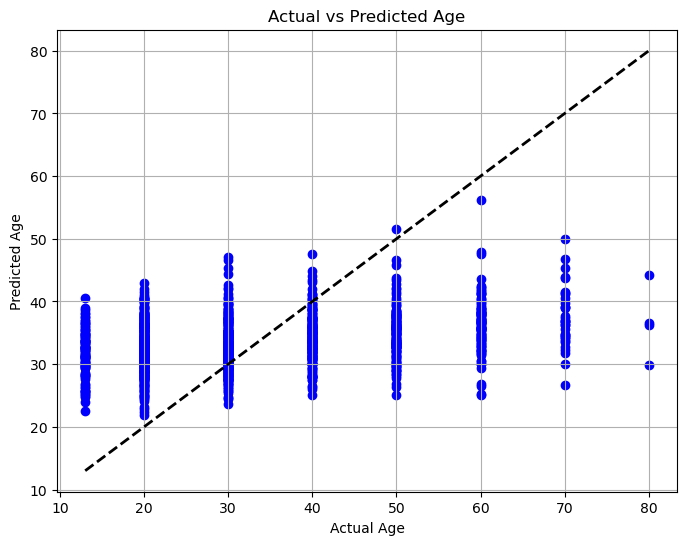

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')  # Use y_pred instead of predicted_age
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.grid(True)
plt.show()


# ii- graph between  each actual age and prediction age

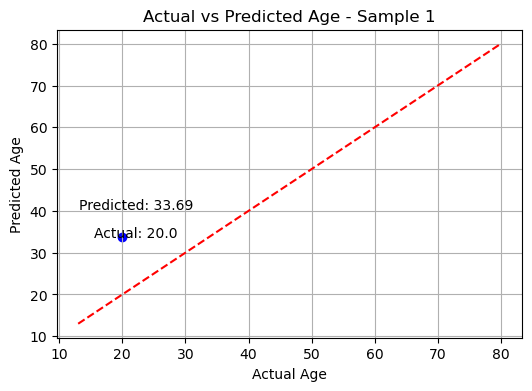

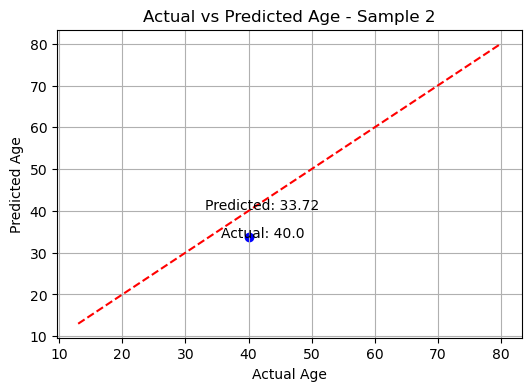

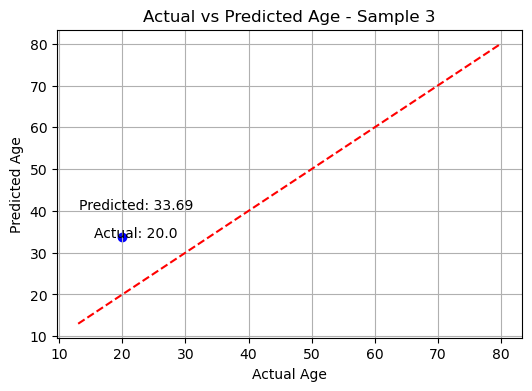

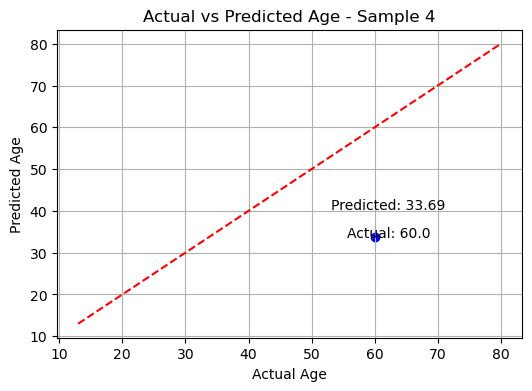

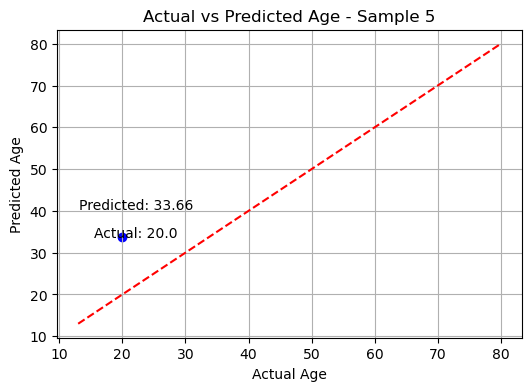

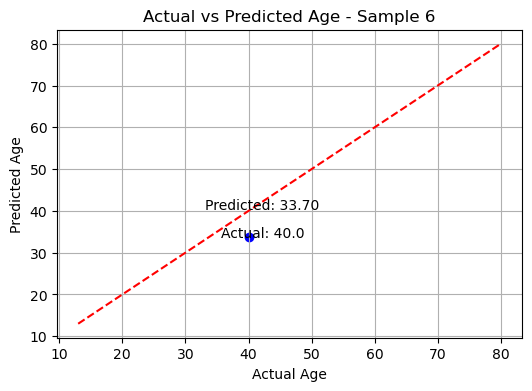

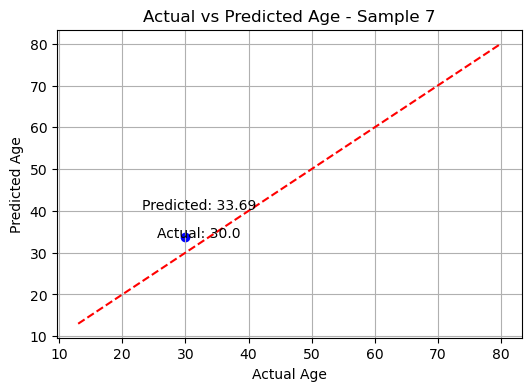

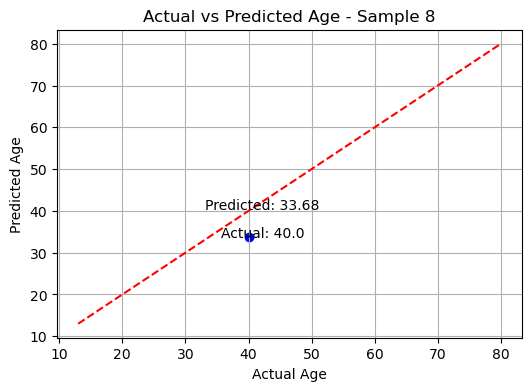

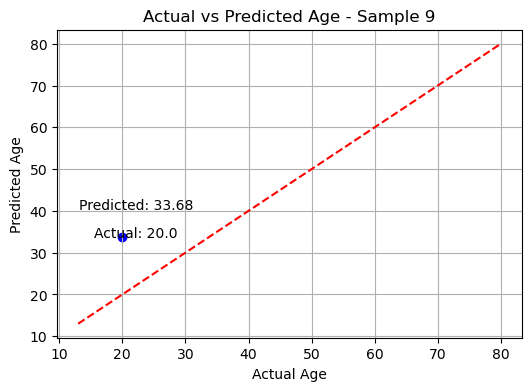

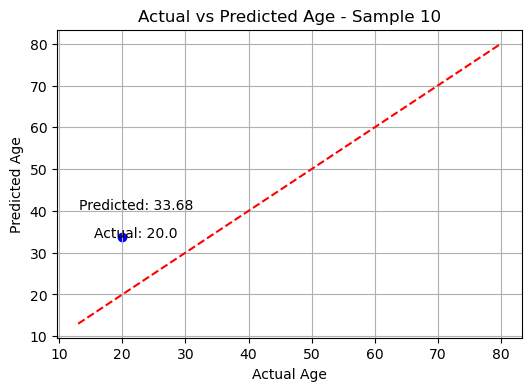

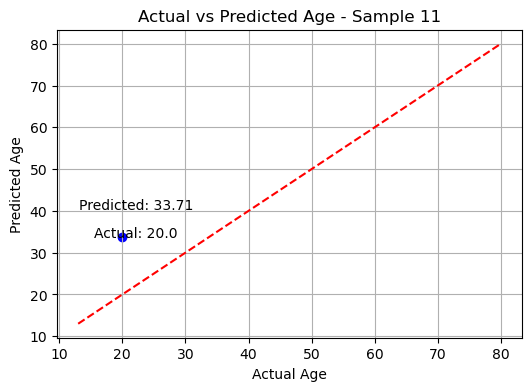

KeyboardInterrupt: 

In [46]:
for i in range(len(y_test)):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test[i], predicted_age[i], color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title(f'Actual vs Predicted Age - Sample {i+1}')
    plt.annotate(f'Actual: {y_test[i]}', (y_test[i], predicted_age[i]), textcoords="offset points", xytext=(10,0), ha='center')
    plt.annotate(f'Predicted: {predicted_age[i]:.2f}', (y_test[i], predicted_age[i]), textcoords="offset points", xytext=(10,20), ha='center')
    plt.grid(True)
    plt.show()

# Graph for r squared

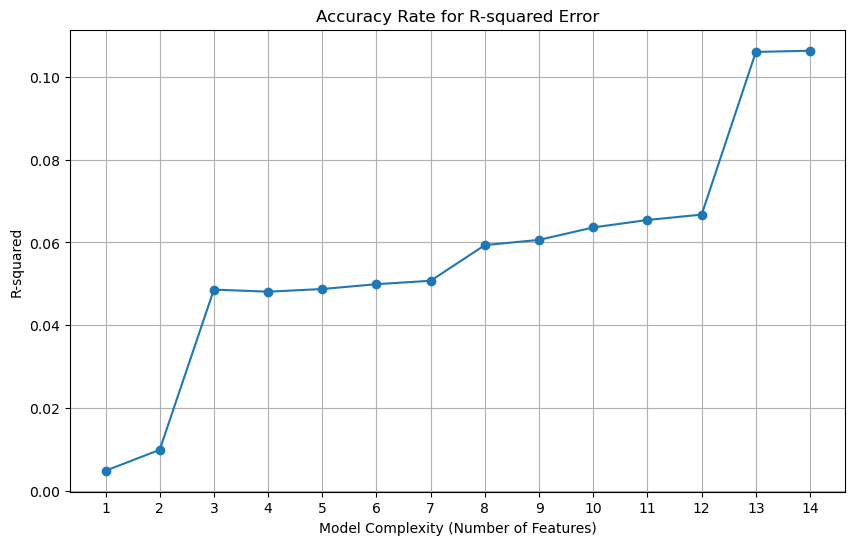

In [14]:

complexity_values = range(1, X.shape[1] + 1)
r_squared_values = []
mae_values = []
mse_values = []
rmse_values = []


for complexity in complexity_values:
    # Select the first 'complexity' number of features
    X_train_subset = X_train[:, :complexity]
    X_test_subset = X_test[:, :complexity]
    
    # Train the model
    coeffs_subset = train_linear_regression(X_train_subset, y_train)
    
    # Make predictions
    y_pred_subset = predict_linear_regression(X_test_subset, coeffs_subset)
    
    # Calculate R-squared
    r2_subset = r_squared(y_test, y_pred_subset)
    
    # Append R-squared value to the list
    r_squared_values.append(r2_subset)
    mae_subset = mean_absolute_error(y_test, y_pred_subset)
    mse_subset = mean_squared_error(y_test, y_pred_subset)
    rmse_subset = root_mean_squared_error(y_test, y_pred_subset)
    
    # Append error values to the lists
    mae_values.append(mae_subset)
    mse_values.append(mse_subset)
    rmse_values.append(rmse_subset)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, r_squared_values, marker='o', linestyle='-')
plt.title('Accuracy Rate for R-squared Error')
plt.xlabel('Model Complexity (Number of Features)')
plt.ylabel('R-squared')
plt.xticks(complexity_values)
plt.grid(True)
plt.show()


# graph for Mean Absolute Error (MAE)

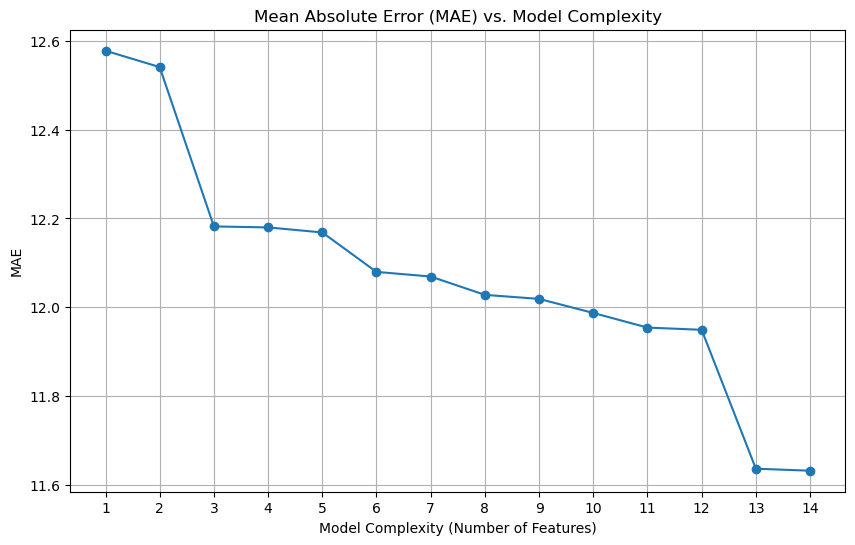

In [33]:
# Plotting MAE
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, mae_values, marker='o', linestyle='-')
plt.title('Mean Absolute Error (MAE) vs. Model Complexity')
plt.xlabel('Model Complexity (Number of Features)')
plt.ylabel('MAE')
plt.xticks(complexity_values)
plt.grid(True)
plt.show()


# graph for Mean Squared Error (MSE)

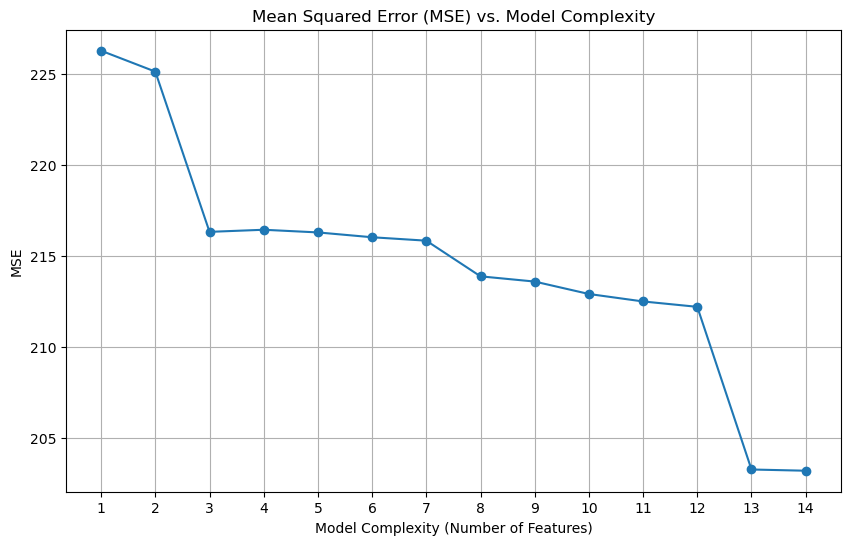

In [16]:
# Plotting MSE
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, mse_values, marker='o', linestyle='-')
plt.title('Mean Squared Error (MSE) vs. Model Complexity')
plt.xlabel('Model Complexity (Number of Features)')
plt.ylabel('MSE')
plt.xticks(complexity_values)
plt.grid(True)
plt.show()

# Root Mean Squared Error

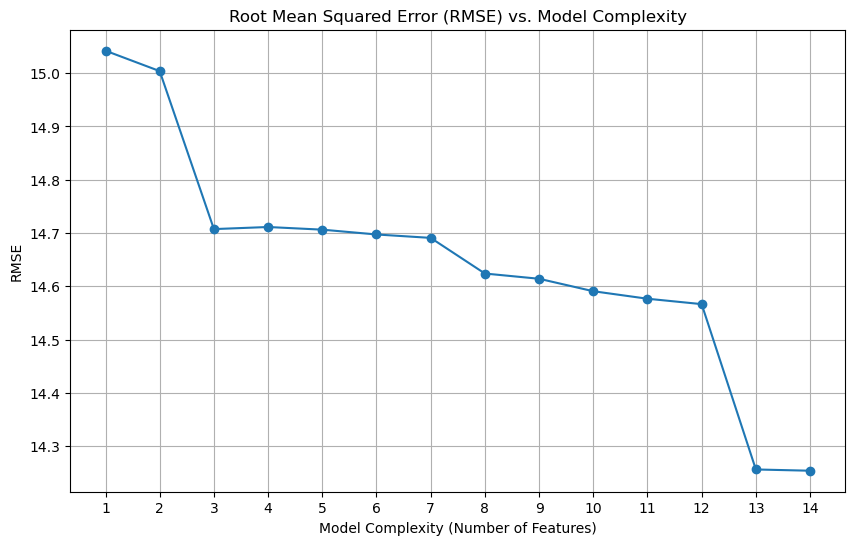

In [17]:
# Plotting RMSE
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, rmse_values, marker='o', linestyle='-')
plt.title('Root Mean Squared Error (RMSE) vs. Model Complexity')
plt.xlabel('Model Complexity (Number of Features)')
plt.ylabel('RMSE')
plt.xticks(complexity_values)
plt.grid(True)
plt.show()

# check by using library

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# i-model

In [31]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Display the predicted ages
print("Predicted Ages:")
for age in y_pred:
    print(age)


Predicted Ages:
33.21971961059947
29.247264437320375
31.497628158618664
39.79228635676212
30.27413453855734
40.32791577124176
31.123719865739574
37.385474303550424
33.38685045601296
26.606357760307574
33.57601717816735
33.52449176328675
33.25433301381305
33.26371335883624
33.606730365457324
28.80948803659024
27.52192031689156
36.25733489093564
37.7708412785389
33.54359271904353
26.66288596589948
33.47103655764181
30.008565341851472
33.80796906871707
34.48652233283712
27.215924221516826
32.114739765863845
35.9014341551965
36.238352063624546
33.33835750656906
37.06937477604648
32.24915300263628
43.80351092226887
35.72142644152347
35.76426032583722
33.67674907454715
35.93938642541012
34.08693521367062
27.76450179995091
31.047289976373865
29.974170527123523
25.72620148524183
33.287254065634734
42.552150280032244
38.68548930815614
33.404226140936046
33.180787859031255
34.40633808333514
34.756432030776196
28.77353061864063
29.85680578926877
33.15060783477975
34.57100425377553
38.967622862149

# graph

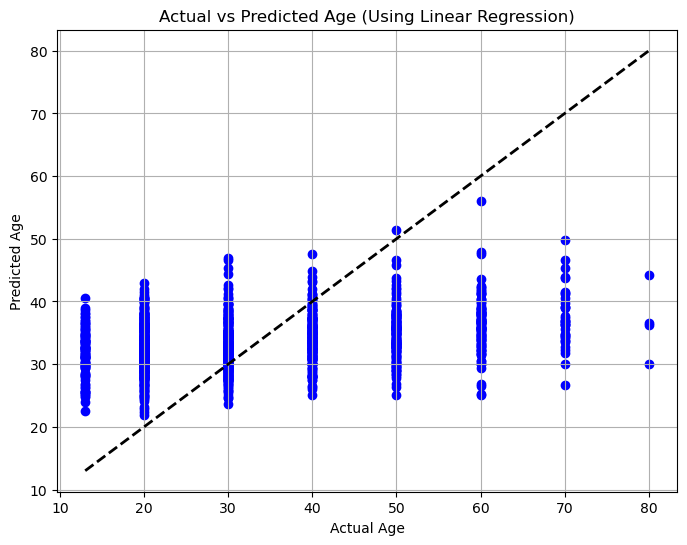

In [32]:

# Plotting actual vs predicted ages
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age (Using Linear Regression)')
plt.grid(True)
plt.show()


In [ ]:
for i in range(len(y_test)):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test[i], predicted_age[i], color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title(f'Actual vs Predicted Age - Sample {i+1}')
    plt.annotate(f'Actual: {y_test[i]}', (y_test[i], predicted_age[i]), textcoords="offset points", xytext=(10,0), ha='center')
    plt.annotate(f'Predicted: {predicted_age[i]:.2f}', (y_test[i], predicted_age[i]), textcoords="offset points", xytext=(10,20), ha='center')
    plt.grid(True)
    plt.show()

# ii-errors checking

In [33]:
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)



# Calculate R-squared (R^2) coefficient of determination
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Coefficient of Determination:", r2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 11.649265068693639
Mean Squared Error (MSE): 203.93628216586268
R-squared (R^2) Coefficient of Determination: 0.10645034233596917
Root Mean Squared Error (RMSE): 14.280626112529614


# iii-Assess the model's performance

In [73]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Initialize an empty list to store MAE for each age group
mae_by_group = []

# Assess performance by calculating MAE for each age group
age_groups = np.unique(y_test)
for age_group in age_groups:
    indices = np.where(y_test == age_group)[0]
    mae = mean_absolute_error(y_test[indices], y_pred[indices])
    mae_by_group.append((age_group, mae))

# Print MAE for each age group
for age_group, mae in mae_by_group:
    print(f"Mean Absolute Error (MAE) for Age Group {age_group}: {mae}")


Mean Absolute Error (MAE) for Age Group 13: 18.773803408960177
Mean Absolute Error (MAE) for Age Group 20: 12.6208611653807
Mean Absolute Error (MAE) for Age Group 30: 3.6592943746412754
Mean Absolute Error (MAE) for Age Group 40: 6.075278596221741
Mean Absolute Error (MAE) for Age Group 50: 15.096309951414332
Mean Absolute Error (MAE) for Age Group 60: 23.679552349128624
Mean Absolute Error (MAE) for Age Group 70: 32.63170845272347
Mean Absolute Error (MAE) for Age Group 80: 43.26204390595559
